In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#READ the csv file and name it as diabetes_df
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Check the datatype of the columns
print(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   preg    768 non-null    int64 
 1   plas    768 non-null    object
 2   pres    768 non-null    object
 3   skin    768 non-null    object
 4   test    768 non-null    object
 5   mass    768 non-null    object
 6   pedi    768 non-null    object
 7   age     768 non-null    int64 
 8   class   768 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 54.1+ KB
None


In [4]:
#Replacing na values with 0 and tba values with 0
diabetes_df.replace({'na': '0', 'tba': '0'}, inplace=True)
#Replacing all the whitespace in between numbers that is causing an error
diabetes_df['pres'] = diabetes_df['pres'].str.replace(' ', '', regex=False)


In [5]:
#Converting columns with continuous data to float64
diabetes_df["mass"] = diabetes_df["mass"].astype('float64')
diabetes_df["pedi"] = diabetes_df["pedi"].astype('float64')

In [6]:
#Converting columns with discrete data to int64
diabetes_df['plas'] = diabetes_df['plas'].astype('int64')
diabetes_df['pres'] = diabetes_df['pres'].astype('int64')
diabetes_df['skin'] = diabetes_df['skin'].astype('int64')
diabetes_df['test'] = diabetes_df['test'].astype('int64')

In [7]:
#Check the datatype of the columns again
print(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [8]:
#Grab the mean of all the columns in order to replace the 0 or NA Values
preg_mean = round(diabetes_df["preg"].mean(),0)
plas_mean = round(diabetes_df["plas"].mean(),0)
pres_mean = round(diabetes_df["pres"].mean(),0)
skin_mean = round(diabetes_df["skin"].mean(),0)
test_mean = round(diabetes_df["test"].mean(),0)
age_mean = round(diabetes_df["age"].mean(),0)
class_mean = round(diabetes_df["class"].mean(),0) 

#Grab the mean of mass which is 1 decimal place
mass_mean = round(diabetes_df["mass"].mean(),1)
#Grab the mean of pedi which is 3 decimal places
pedi_mean = round(diabetes_df["pedi"].mean(),3)

In [9]:
#Replacing the 0 values with the column mean
diabetes_df["preg"].replace(0, preg_mean, inplace=True)
diabetes_df["plas"].replace(0, plas_mean, inplace=True)
diabetes_df["pres"].replace(0, pres_mean, inplace=True)
diabetes_df["skin"].replace(0, skin_mean, inplace=True)
diabetes_df["test"].replace(0, test_mean, inplace=True)
diabetes_df["age"].replace(0, age_mean, inplace=True)
diabetes_df["class"].replace(0, class_mean, inplace=True)

diabetes_df.head(10)




/tmp/ipykernel_2105/2778465297.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_df["preg"].replace(0, preg_mean, inplace=True)
/tmp/ipykernel_2105/2778465297.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,80,33.6,0.627,50,1
1,1,85,66,29,80,26.6,0.351,31,0
2,8,183,64,21,80,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,4,137,40,35,168,43.1,2.288,33,1
5,5,116,74,21,80,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,69,21,80,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,21,80,0.0,0.232,54,1


In [10]:
#Replacing pedi and mass 0 values into their respective column mean
diabetes_df['pedi'].replace(0.0, pedi_mean, inplace=True)
diabetes_df['mass'].replace(0.0, mass_mean, inplace=True)

/tmp/ipykernel_2105/3394448339.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_df['pedi'].replace(0.0, pedi_mean, inplace=True)
/tmp/ipykernel_2105/3394448339.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [11]:
#Printing the descriptive statistics
print(diabetes_df.describe())

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     4.423177  121.669271   72.253906   26.768229  118.753906   32.466276   
std      2.980481   30.397454   12.115669    9.519125   93.041148    6.864558   
min      1.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      2.000000   99.750000   64.000000   21.000000   80.000000   27.575000   
50%      4.000000  117.500000   72.000000   23.000000   80.000000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.472318   33.240885    0.348958  
std      0.331208   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [12]:
#Print Class Distribution
diabetes_df.groupby('class').size()

class
0    500
1    268
dtype: int64

In [13]:
#Print the Correlation Matrix
diabetes_df.corr(method='pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.153066,0.254199,0.049140,-0.016362,0.100070,-0.010053,0.522303,0.248172
plas,0.153066,1.000000,0.218708,0.157964,0.391643,0.231092,0.134903,0.266059,0.493310
pres,0.254199,0.218708,1.000000,0.132720,0.011255,0.284384,-0.000764,0.326716,0.162664
skin,0.049140,0.157964,0.132720,1.000000,0.235866,0.535953,0.151802,0.029033,0.176353
test,-0.016362,0.391643,0.011255,0.235866,1.000000,0.188670,0.157045,0.038898,0.179336
mass,0.100070,0.231092,0.284384,0.535953,0.188670,1.000000,0.152791,0.023341,0.311021
pedi,-0.010053,0.134903,-0.000764,0.151802,0.157045,0.152791,1.000000,0.032714,0.172931
age,0.522303,0.266059,0.326716,0.029033,0.038898,0.023341,0.032714,1.000000,0.238356
class,0.248172,0.493310,0.162664,0.176353,0.179336,0.311021,0.172931,0.238356,1.000000


In [14]:
#Print the skew distribution
diabetes_df_skew = diabetes_df.skew()
print(diabetes_df_skew)

preg     1.023716
plas     0.535381
pres     0.173356
skin     1.245949
test     3.293486
mass     0.601416
pedi     1.918424
age      1.129597
class    0.635017
dtype: float64


Text(0.5, 1.0, 'Correlation Heatmap of Diabetes Data')

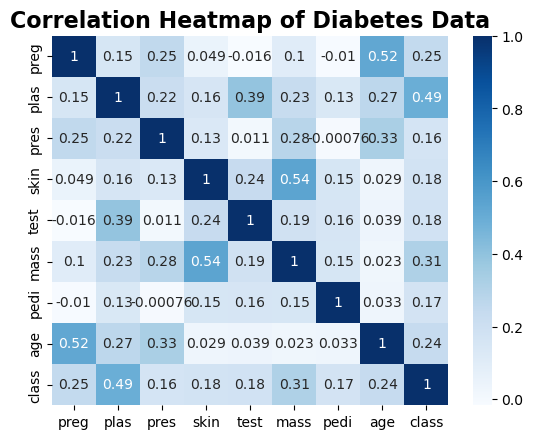

In [15]:
# plotting correlation heatmap 
sns.heatmap(diabetes_df.corr(), cmap="Blues", annot=True)
plt.title("Correlation Heatmap of Diabetes Data", fontweight='bold', fontsize=16)

Text(0.5, 1.0, 'Correlation Heatmap of Diabetes Data')

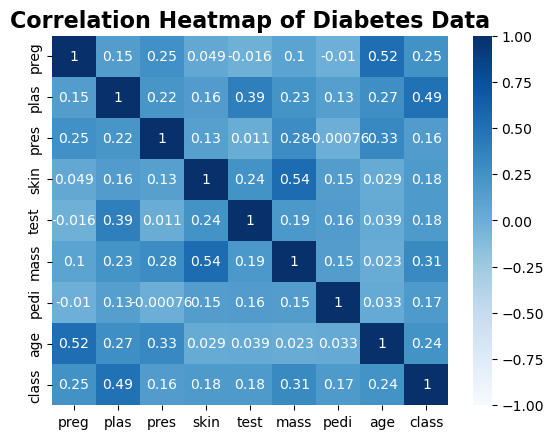

In [16]:
# plotting correlation heatmap
sns.heatmap(diabetes_df.corr(), cmap="Blues", annot=True, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Diabetes Data", fontweight='bold', fontsize=16)

/tmp/ipykernel_2105/3520774369.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diabetes_df_skew,color="red", shade=True)


preg     1.023716
plas     0.535381
pres     0.173356
skin     1.245949
test     3.293486
mass     0.601416
pedi     1.918424
age      1.129597
class    0.635017
dtype: float64


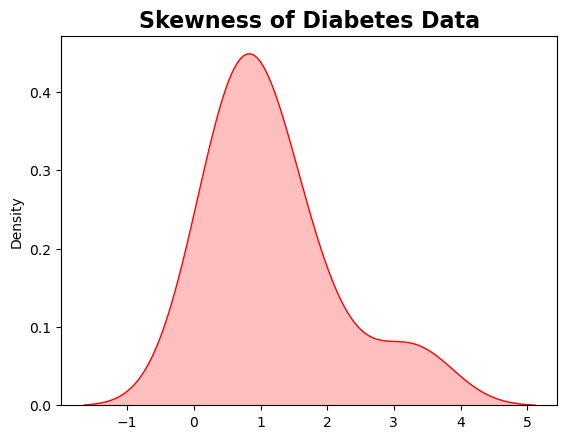

In [17]:

sns.kdeplot(diabetes_df_skew,color="red", shade=True)
plt.title("Skewness of Diabetes Data", fontweight='bold', fontsize=16)
print(diabetes_df.skew())

Text(0.5, 1.0, 'Skewness of Diabetes Data')

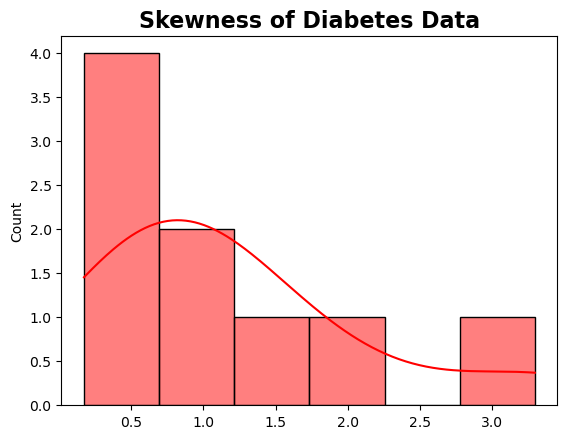

In [18]:
#diabetes_df["age"].skew()
sns.histplot(diabetes_df_skew,color="red", kde=True)
plt.title("Skewness of Diabetes Data", fontweight='bold', fontsize=16)

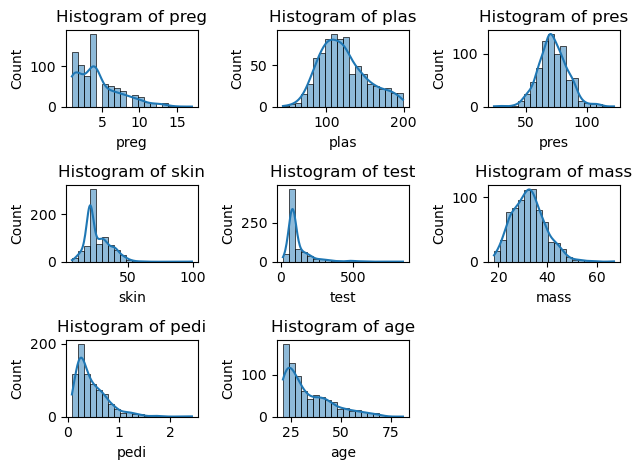

In [19]:
#Plotting the skewness of each column using histplot and adding kde 
plt.subplot(3, 3, 1)
sns.histplot(diabetes_df['preg'], bins=20, kde=True)
plt.title('Histogram of preg')

plt.subplot(3, 3, 2)
sns.histplot(diabetes_df['plas'], bins=20, kde=True)
plt.title('Histogram of plas')

plt.subplot(3, 3, 3)
sns.histplot(diabetes_df['pres'], bins=20, kde=True)
plt.title('Histogram of pres')

plt.subplot(3, 3, 4)
sns.histplot(diabetes_df['skin'], bins=20, kde=True)
plt.title('Histogram of skin')

plt.subplot(3, 3, 5)
sns.histplot(diabetes_df['test'], bins=20, kde=True)
plt.title('Histogram of test')

plt.subplot(3, 3, 6)
sns.histplot(diabetes_df['mass'], bins=20, kde=True)
plt.title('Histogram of mass')

plt.subplot(3, 3, 7)
sns.histplot(diabetes_df['pedi'], bins=20, kde=True)
plt.title('Histogram of pedi')

plt.subplot(3, 3, 8)
sns.histplot(diabetes_df['age'], bins=20, kde=True)
plt.title('Histogram of age')



# Adjust layout to prevent overlap
plt.tight_layout()

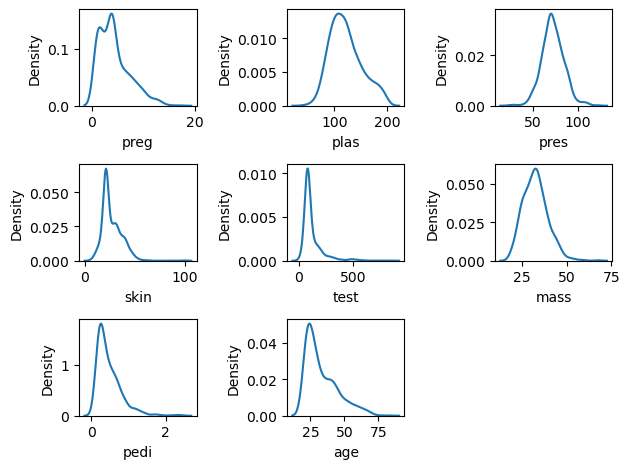

In [20]:


plt.subplot(3, 3, 1)
sns.kdeplot(diabetes_df['preg'])
#plt.title('Histogram of preg')

plt.subplot(3, 3, 2)
sns.kdeplot(diabetes_df['plas'])
#plt.title('Histogram of plas')

plt.subplot(3, 3, 3)
sns.kdeplot(diabetes_df['pres'])
#plt.title('Histogram of pres')

plt.subplot(3, 3, 4)
sns.kdeplot(diabetes_df['skin'])
#plt.title('Histogram of skin')

plt.subplot(3, 3, 5)
sns.kdeplot(diabetes_df['test'])
#plt.title('Histogram of test')

plt.subplot(3, 3, 6)
sns.kdeplot(diabetes_df['mass'])
#plt.title('Histogram of mass'),QWE

plt.subplot(3, 3, 7)
sns.kdeplot(diabetes_df['pedi'])
#plt.title('Histogram of pedi')

plt.subplot(3, 3, 8)
sns.kdeplot(diabetes_df['age'])
#plt.title('Histogram of age')



# Adjust layout to prevent overlap
plt.tight_layout()

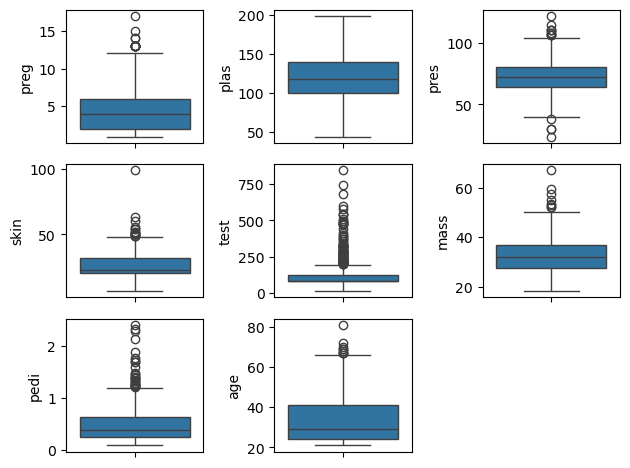

In [21]:
#Boxplot plotting

plt.subplot(3, 3, 1)
sns.boxplot(diabetes_df['preg'])


plt.subplot(3, 3, 2)
sns.boxplot(diabetes_df['plas'])


plt.subplot(3, 3, 3)
sns.boxplot(diabetes_df['pres'])


plt.subplot(3, 3, 4)
sns.boxplot(diabetes_df['skin'])


plt.subplot(3, 3, 5)
sns.boxplot(diabetes_df['test'])


plt.subplot(3, 3, 6)
sns.boxplot(diabetes_df['mass'])


plt.subplot(3, 3, 7)
sns.boxplot(diabetes_df['pedi'])


plt.subplot(3, 3, 8)
sns.boxplot(diabetes_df['age'])




# Adjust layout to prevent overlap
plt.tight_layout()